In [2]:
# Install a pip package in the current Jupyter kernel
!python --version
import sys
!{sys.executable} -m pip install numpy pandas matplotlib

Python 3.10.2


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
def calculate_mean(q, method,table):
  #url = f'https://raw.githubusercontent.com/lordpretzel/prov_semanticopt_experiment/master/results/runtime_{q}_{table}_{method}.csv'
  url = f'https://raw.githubusercontent.com/lordpretzel/prov_semanticopt_experiment/master/results_n1/runtime_{q}_{table}_{method}.csv'
  df = pd.read_csv(url, header=None, delimiter=',')
  df = df.set_axis(["time"], axis=1)
  return df['time'].mean()

allmethods = ['flatten', 'unopt', 'opt', 'optnoflat'] # ['flatten', 'unopt', 'opt']
allqueries = ['01','02','03', '04', '05', '06', '07', '08', '09','10','11', '14', '17', '19', '20'] # ,'02','03']

queries = {
    "01": ["lineitem"],
    "02": ["nation", "part", "partsupp", "region"],
    "03": ["customer", "lineitem", "orders"],
    "04": ["lineitem"], #"orders"],
    "05": ["customer", "lineitem", "nation", "orders", "region"],
    "06": ["lineitem"],
    "07": ["customer", "lineitem", "nation", "orders", "supplier"],
    "08": ["customer", "nation", "part", "supplier"],
    "09": ["lineitem", "nation", "orders", "part", "partsupp", "supplier"],
    "10": ["customer", "lineitem", "nation", "orders"],
    "11": ["nation", "partsupp", "supplier"],
    "12": ["lineitem", "orders"],
    "13": ["customer", "orders"],
    "14": ["lineitem", "part"],
    "15": ["lineitem", "supplier"],
    "16": ["part", "partsupp", "supplier"],
    "17": ["lineitem", "part"],
    "18": ["customer", "lineitem", "orders"],
    "19": ["lineitem", "part"],
    "20": ["part"],
    }

In [5]:
allresult = {}
for q in allqueries: #['01','02', ...
    allresult[q] = {} #has to exist before assigning sub-whatever
    for table in queries[q]: #[part,region, ...]
        resultsforq = {}
        for method in allmethods: # ['flatten', 'unopt', 'opt'] 
            try:
                mean = calculate_mean(q,method,table)
                resultsforq[method] = mean
                #print(resultsforq)
            except:
                print("ERROR "+str(q),table,method,sep="_")
        #print(allresult)
        allresult[q][table] = resultsforq
allresult 

{'01': {'lineitem': {'flatten': 11666.41324,
   'unopt': 10713.953040000002,
   'opt': 11659.871060000001,
   'optnoflat': 10664.90242}},
 '02': {'nation': {'flatten': 1126.15758,
   'unopt': 54.675190000000015,
   'opt': 865.7344400000001,
   'optnoflat': 48.84674000000001},
  'part': {'flatten': 1083.7634699999999,
   'unopt': 53.47806,
   'opt': 17.057669999999998,
   'optnoflat': 47.268600000000006},
  'partsupp': {'flatten': 1083.46696,
   'unopt': 52.75401000000001,
   'opt': 874.28151,
   'optnoflat': 49.688050000000004},
  'region': {'flatten': 1111.1686999999997,
   'unopt': 57.28273,
   'opt': 844.9275700000002,
   'optnoflat': 50.13236}},
 '03': {'customer': {'flatten': 5.163239999999999,
   'unopt': 5.41712,
   'opt': 4.08369,
   'optnoflat': 4.477180000000001},
  'lineitem': {'flatten': 5.185010000000001,
   'unopt': 5.383309999999999,
   'opt': 3.5265400000000007,
   'optnoflat': 3.242079999999999},
  'orders': {'flatten': 5.1160000000000005,
   'unopt': 5.434320000000000

In [36]:
dfs = {}
for q in allqueries:
    qdata = allresult[q]
    qdict = { k: [] for k in allmethods }
    tables = qdata.keys()
    for t in qdata:
        for m in allmethods:
            qdict[m] = qdict[m] + [qdata[t][m]]        
    dfs[q] = pd.DataFrame(data=qdict, index=tables)
    dfs[q] = round(dfs[q])
dfs

{'01':           flatten    unopt      opt  optnoflat
 lineitem  11666.0  10714.0  11660.0    10665.0,
 '02':           flatten  unopt    opt  optnoflat
 nation     1126.0   55.0  866.0       49.0
 part       1084.0   53.0   17.0       47.0
 partsupp   1083.0   53.0  874.0       50.0
 region     1111.0   57.0  845.0       50.0,
 '03':           flatten  unopt  opt  optnoflat
 customer      5.0    5.0  4.0        4.0
 lineitem      5.0    5.0  4.0        3.0
 orders        5.0    5.0  3.0        3.0,
 '04':           flatten   unopt    opt  optnoflat
 lineitem    948.0  3482.0  948.0     3469.0,
 '05':           flatten  unopt    opt  optnoflat
 customer    474.0  476.0  476.0      477.0
 lineitem    486.0  484.0  482.0      485.0
 nation      471.0  472.0  471.0      474.0
 orders      477.0  477.0  478.0      478.0
 region      473.0  468.0  415.0      419.0,
 '06':           flatten   unopt     opt  optnoflat
 lineitem   1156.0  1156.0  1158.0     1154.0,
 '07':           flatten    

In [50]:
bestdfs = {}
for q in allqueries:
   df = dfs[q].copy()
   df['nonopt-best'] = df[['flatten','unopt']].min(axis=1)
   df['opt-best'] = df[['opt','optnoflat']].min(axis=1) 
   df = df.drop(columns=['opt','optnoflat','flatten','unopt'])
   cols = ['nonopt-best', 'opt-best']
   df = df[cols]
   bestdfs[q] = df
bestdfs

{'01':           nonopt-best  opt-best
 lineitem      10714.0   10665.0,
 '02':           nonopt-best  opt-best
 nation           55.0      49.0
 part             53.0      17.0
 partsupp         53.0      50.0
 region           57.0      50.0,
 '03':           nonopt-best  opt-best
 customer          5.0       4.0
 lineitem          5.0       3.0
 orders            5.0       3.0,
 '04':           nonopt-best  opt-best
 lineitem        948.0     948.0,
 '05':           nonopt-best  opt-best
 customer        474.0     476.0
 lineitem        484.0     482.0
 nation          471.0     471.0
 orders          477.0     478.0
 region          468.0     415.0,
 '06':           nonopt-best  opt-best
 lineitem       1156.0    1154.0,
 '07':           nonopt-best  opt-best
 customer       3682.0   10379.0
 lineitem       3759.0   11224.0
 nation         4149.0   27603.0
 orders         3632.0   10513.0
 supplier       3723.0   10345.0,
 '08':           nonopt-best  opt-best
 customer        510.

# All data together and compute stats

In [49]:
merged_df = pd.concat([ dfs[q] for q in dfs.keys() ])
merged_df['nonopt-best'] = merged_df[['flatten','unopt']].min(axis=1)
merged_df['opt-best'] = merged_df[['opt','optnoflat']].min(axis=1) 
merged_df

total_df = merged_df.sum()
relative_avg = merged_df.copy()
relative_avg['min'] = relative_avg.min(axis=1)

total_df



flatten          77354.0
unopt            75822.0
opt             118293.0
optnoflat      2524072.0
nonopt-best      61869.0
opt-best        111430.0
dtype: float64

In [51]:
def plotquery(df, ax, show=False):
    tables = list(df.index)
    series = df.columns.to_list()
    numbars = len(series)
    x = np.arange(len(tables))  # the label locations
    width = 0.3  # the width of the bars

    rects = {}
    for i, m in enumerate(series):
        rects[m] = ax.bar(x - width/2 + (width/numbars)*i, df[m], width/4, label=m)
        ax.bar_label(rects[m], padding=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Runtime (msec)')
    ax.set_title('Capture Runtime ' + q)
    ax.set_xticks(x, tables)
    ax.legend()
    if show:
        plt.show()

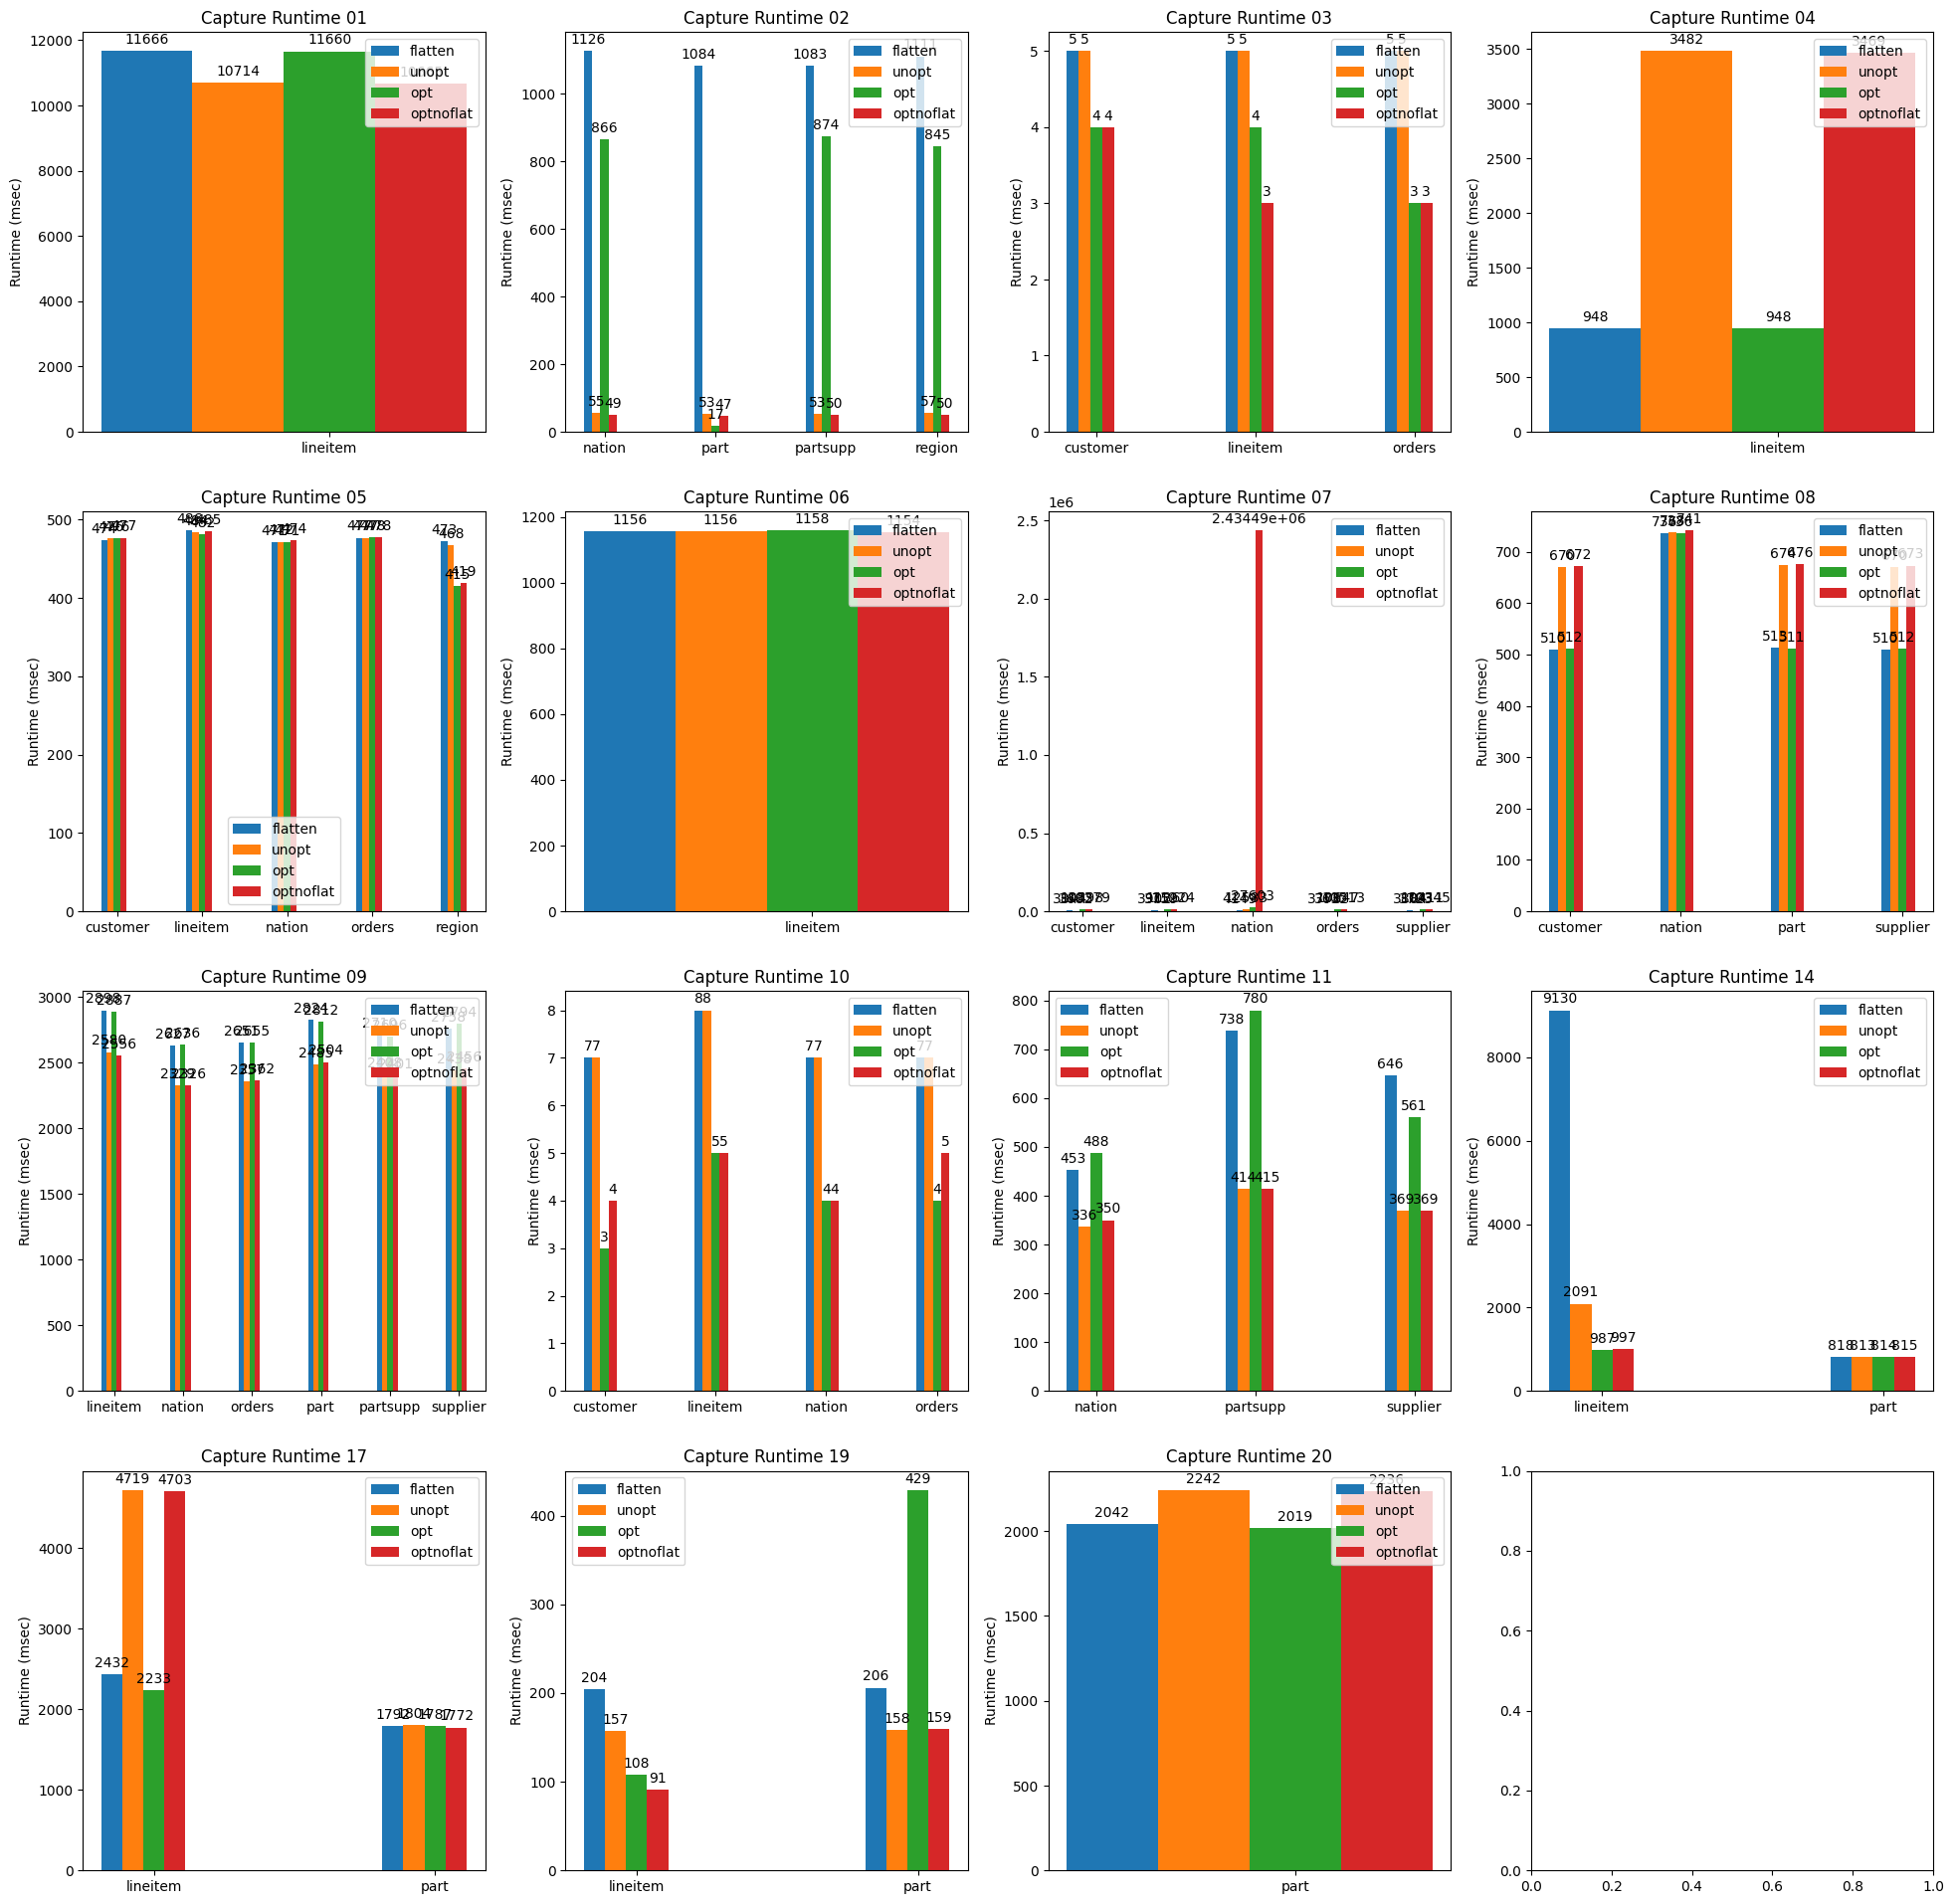

In [52]:
x, y = 4,4
scale = 6
plotfile = 'qplots.pdf'
plt.rcParams["figure.figsize"] = [scale * x, scale * y]
fig, axs = plt.subplots(y,x)
axs = [ item for a in axs for item in a ]

for qpos, q in enumerate(allqueries):
    plotquery(dfs[q], axs[qpos])

if os.path.exists(plotfile):
    os.remove(plotfile)
plt.savefig(plotfile, format='pdf')


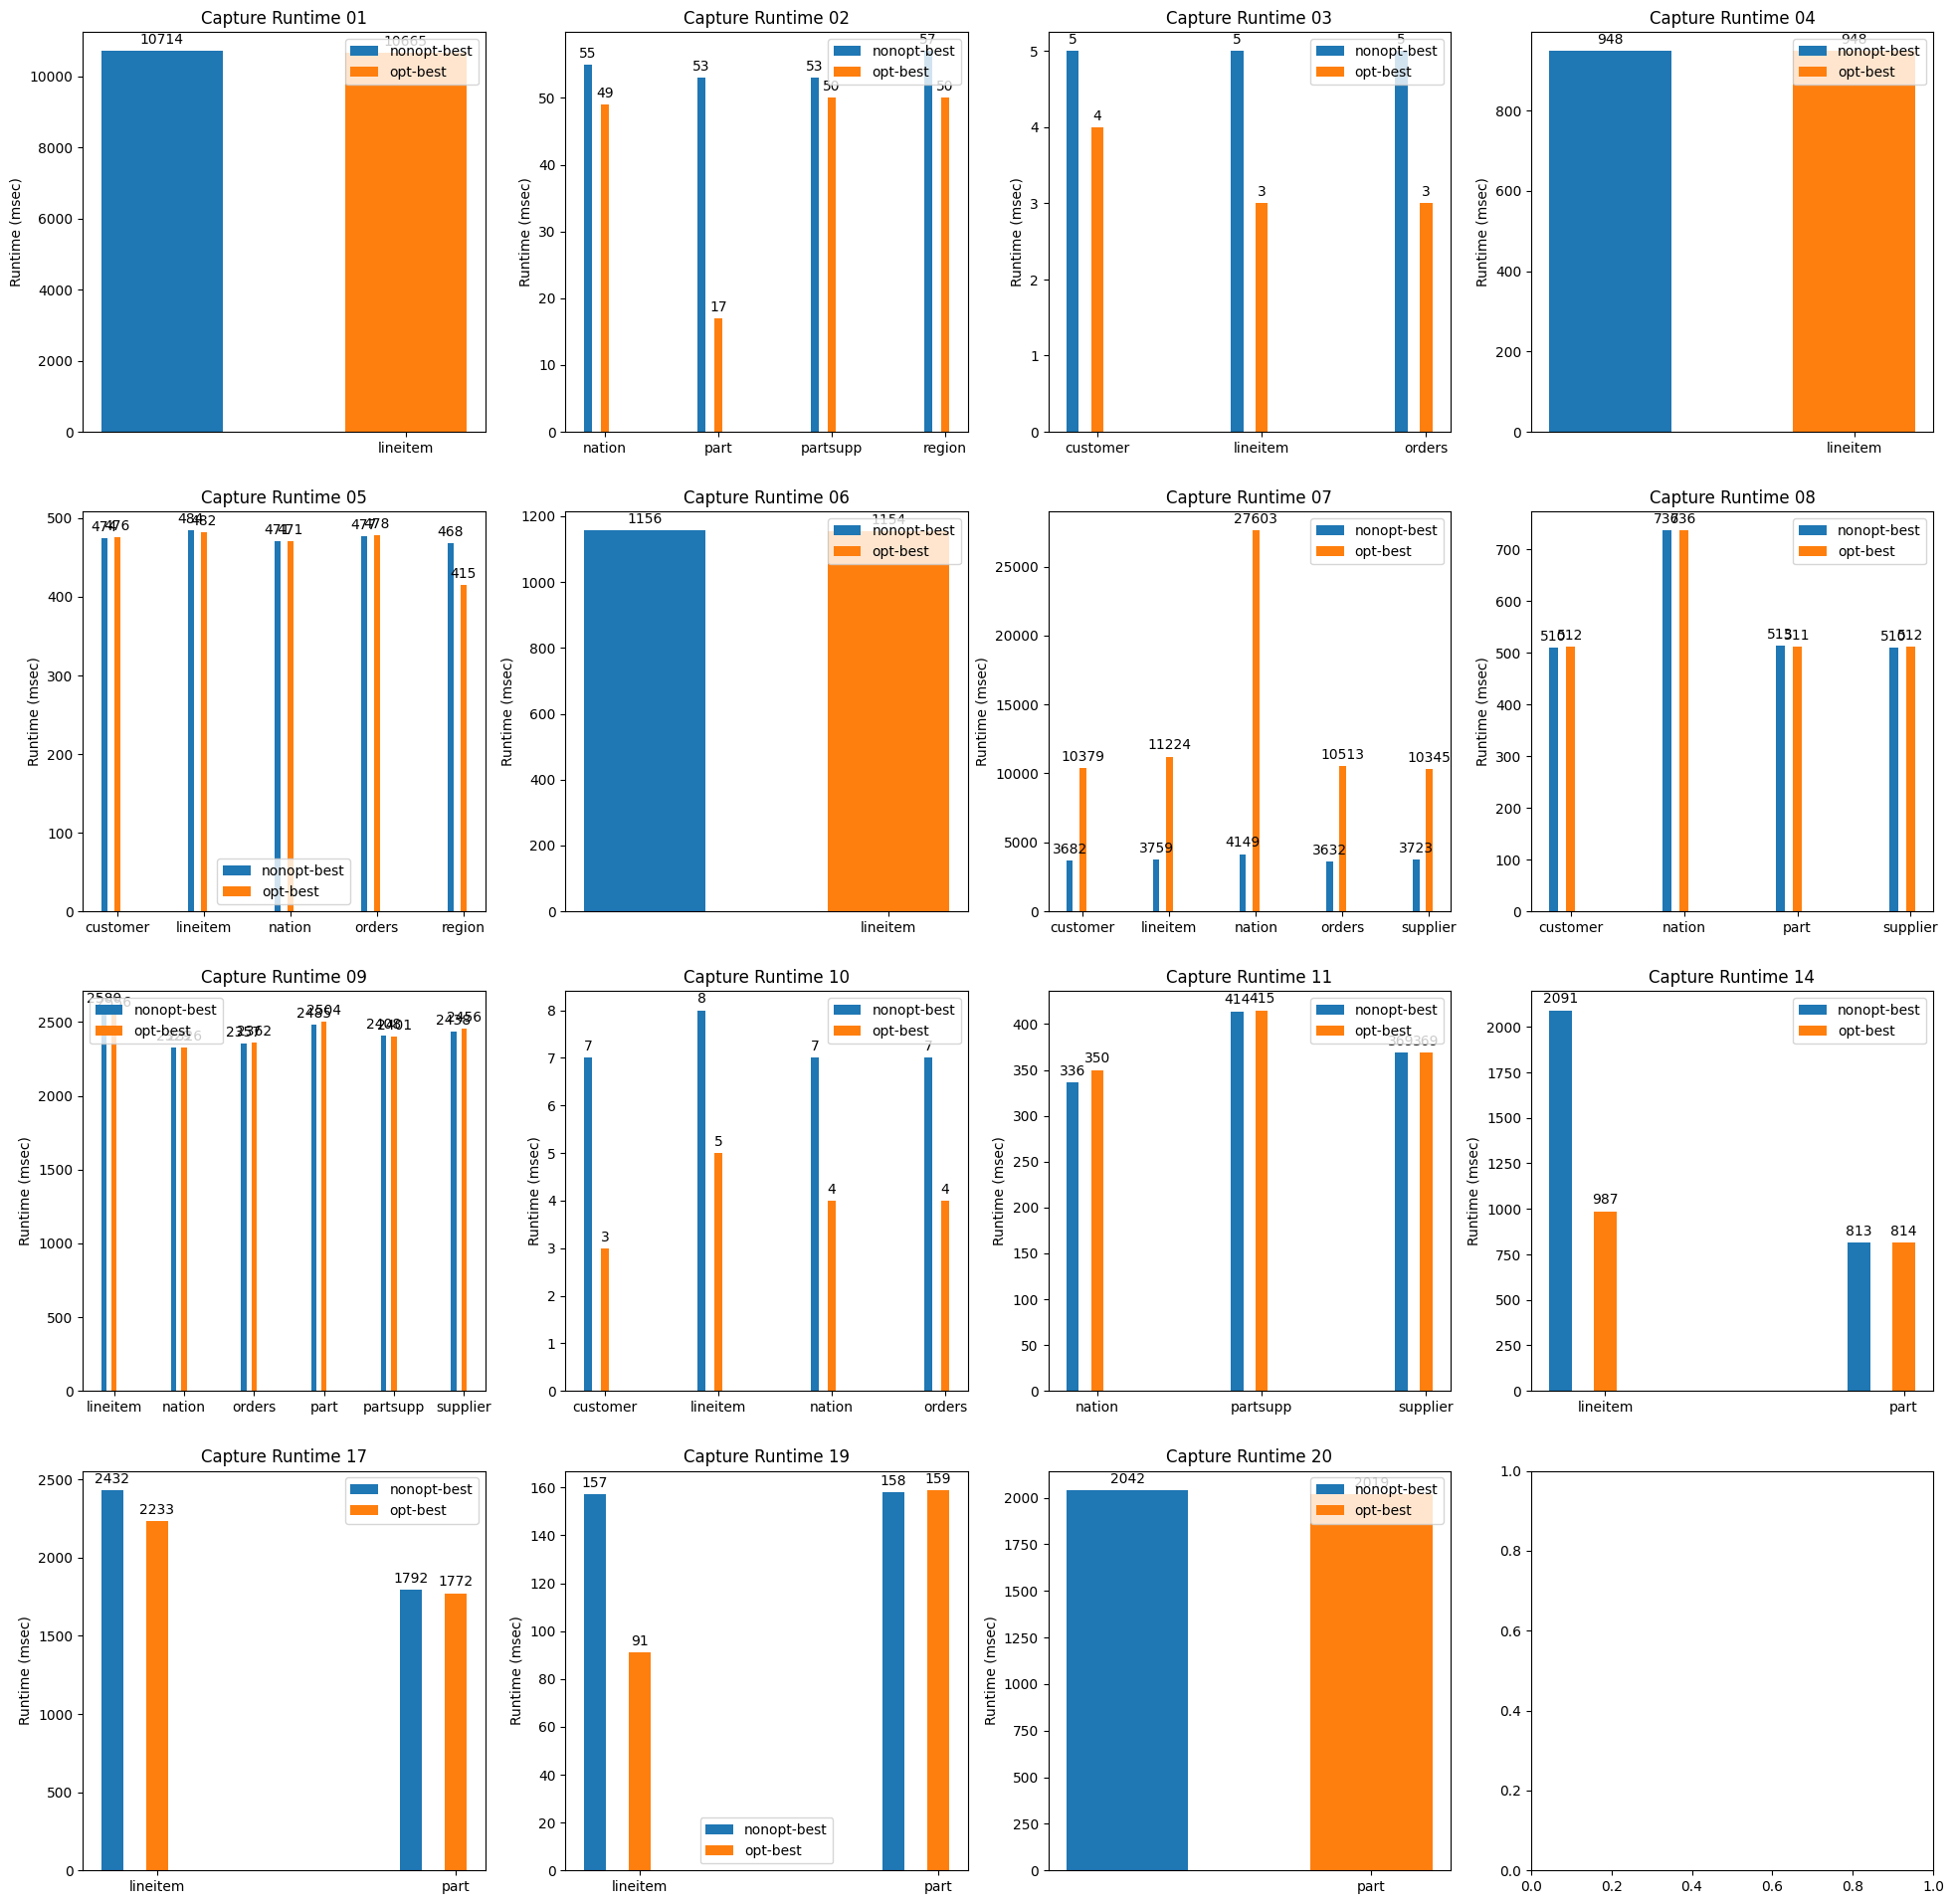

In [53]:
x, y = 4,4
scale = 6
plotfile = 'qplots-best.pdf'
plt.rcParams["figure.figsize"] = [scale * x, scale * y]
fig, axs = plt.subplots(y,x)
axs = [ item for a in axs for item in a ]

for qpos, q in enumerate(allqueries):
    plotquery(bestdfs[q], axs[qpos])

if os.path.exists(plotfile):
    os.remove(plotfile)
plt.savefig(plotfile, format='pdf')